In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Dense, LeakyReLU, Dropout, BatchNormalization, Input, Reshape, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, _), (_, _) = mnist.load_data()
x_train = x_train.astype(np.float32) / 255
x_train = x_train.reshape((-1, 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
generator = Sequential()

generator.add(Input(shape=(100, )))
generator.add(Dense(7*7*128))
generator.add(Reshape((7, 7, 128)))
generator.add(Conv2DTranspose(filters=128, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(0.2))
generator.add(Conv2DTranspose(filters=256, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(0.2))
generator.add(Conv2DTranspose(filters=512, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(0.2))
generator.add(Conv2D(filters=1, kernel_size=5, strides=2, padding="same", activation="sigmoid"))

generator.compile(optimizer=Adam(0.001, 0.5), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
descriminator = Sequential()

descriminator.add(Input(shape=(28, 28, 1)))
descriminator.add(Conv2D(filters=64, kernel_size=4, strides=2, padding="same"))
descriminator.add(LeakyReLU(0.2))
descriminator.add(Conv2D(filters=128, kernel_size=4, strides=2, padding="same"))
descriminator.add(LeakyReLU(0.2))
descriminator.add(Conv2D(filters=128, kernel_size=4, strides=2, padding="same"))
descriminator.add(LeakyReLU(0.2))
descriminator.add(Flatten())
descriminator.add(Dropout(0.2))
descriminator.add(Dense(1, activation="sigmoid"))

descriminator.compile(optimizer=Adam(0.001, 0.5), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
descriminator.trainable = False
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = descriminator(x)

gan = Model(inputs=gan_input, outputs=gan_output)
gan.compile(optimizer=Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
epochs = 300
sample_size = 128

for e in tqdm(range(epochs)):

  z = np.random.normal(size=(sample_size, 100))
  gen_img = generator.predict(z, verbose=0)
  x_rand = x_train[np.random.randint(0, x_train.shape[0], size=(128,))]

  sample_x = np.concatenate([gen_img, x_rand])
  sample_y = np.zeros(2*sample_size)
  sample_y[sample_size:] += 0.95

  descriminator.trainable = True
  descriminator.fit(sample_x, sample_y, epochs=1, verbose=0)

  descriminator.trainable = False

  x_gen = np.random.normal(size=(sample_size, 100))
  y_gen = np.ones(sample_size)

  gan.fit(x_gen, y_gen, epochs=1, verbose=0)

  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
z_test = np.random.normal(size=(10, 100))
imgs = generator.predict(z_test)

1/1 [==============================] - 0s 83ms/step


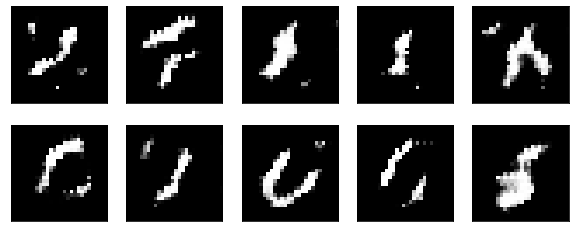

In [ ]:
fig = plt.figure(figsize=(10, 4))
for i in range(10):
  ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
  ax.imshow(imgs[i].reshape((28, 28, 1)), cmap="gray")

In [ ]:
generator.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1152)              116352    
                                                                 
 reshape_16 (Reshape)        (None, 3, 3, 128)         0         
                                                                 
 conv2d_transpose_36 (Conv2D  (None, 6, 6, 16)         32784     
 Transpose)                                                      
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 6, 6, 16)          0         
                                                                 
 conv2d_transpose_37 (Conv2D  (None, 12, 12, 32)       8224      
 Transpose)                                                      
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 12, 12, 32)      